In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(cowplot)
    library(patchwork)
    library(colors3d)
    library(prismatic)
    library(pals)
    theme_set(theme_cowplot())
})
options(repr.plot.width=16,repr.plot.height=10)

# Bivariate Color Palette

## code

In [2]:
map_to_color2d <- function(data, xvar, yvar, colors=c("yellow", "green", "blue", "magenta"), xtrans="rank", ytrans="rank", size=5, na.color='white') {
    data |>
    summarize(
        min_x = min({{xvar}},na.rm=T), max_x = max({{xvar}},na.rm=T),
        min_y = min({{yvar}},na.rm=T), max_y = max({{yvar}},na.rm=T)
    ) |>
    with(expand_grid(
        x = seq(min_x, max_x, length.out = size),
        y = seq(min_y, max_y, length.out = size)
    )) |>
    mutate(
        color = colors2d(tibble(x,y), xtrans = xtrans, ytrans = ytrans, colors=colors)
    ) |>
    ggplot(aes(x,y,fill=color)) +
    geom_raster() +
    scale_fill_identity() +
    labs(x=as_label(enquo(xvar)), y=as_label(enquo(yvar))) +
    coord_cartesian(expand=0) -> lgd

    data2 <-
    select(data, {{xvar}}, {{yvar}}) |>
    colors2d(xtrans = xtrans, ytrans = ytrans, colors=colors) |>
    bind_cols(data, color=_) |>
    mutate(color=ifelse(is.na({{xvar}}) | is.na({{yvar}}), na.color, color)) 

    list(data=data2, legend=lgd)
}

## example

In [3]:
head(iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


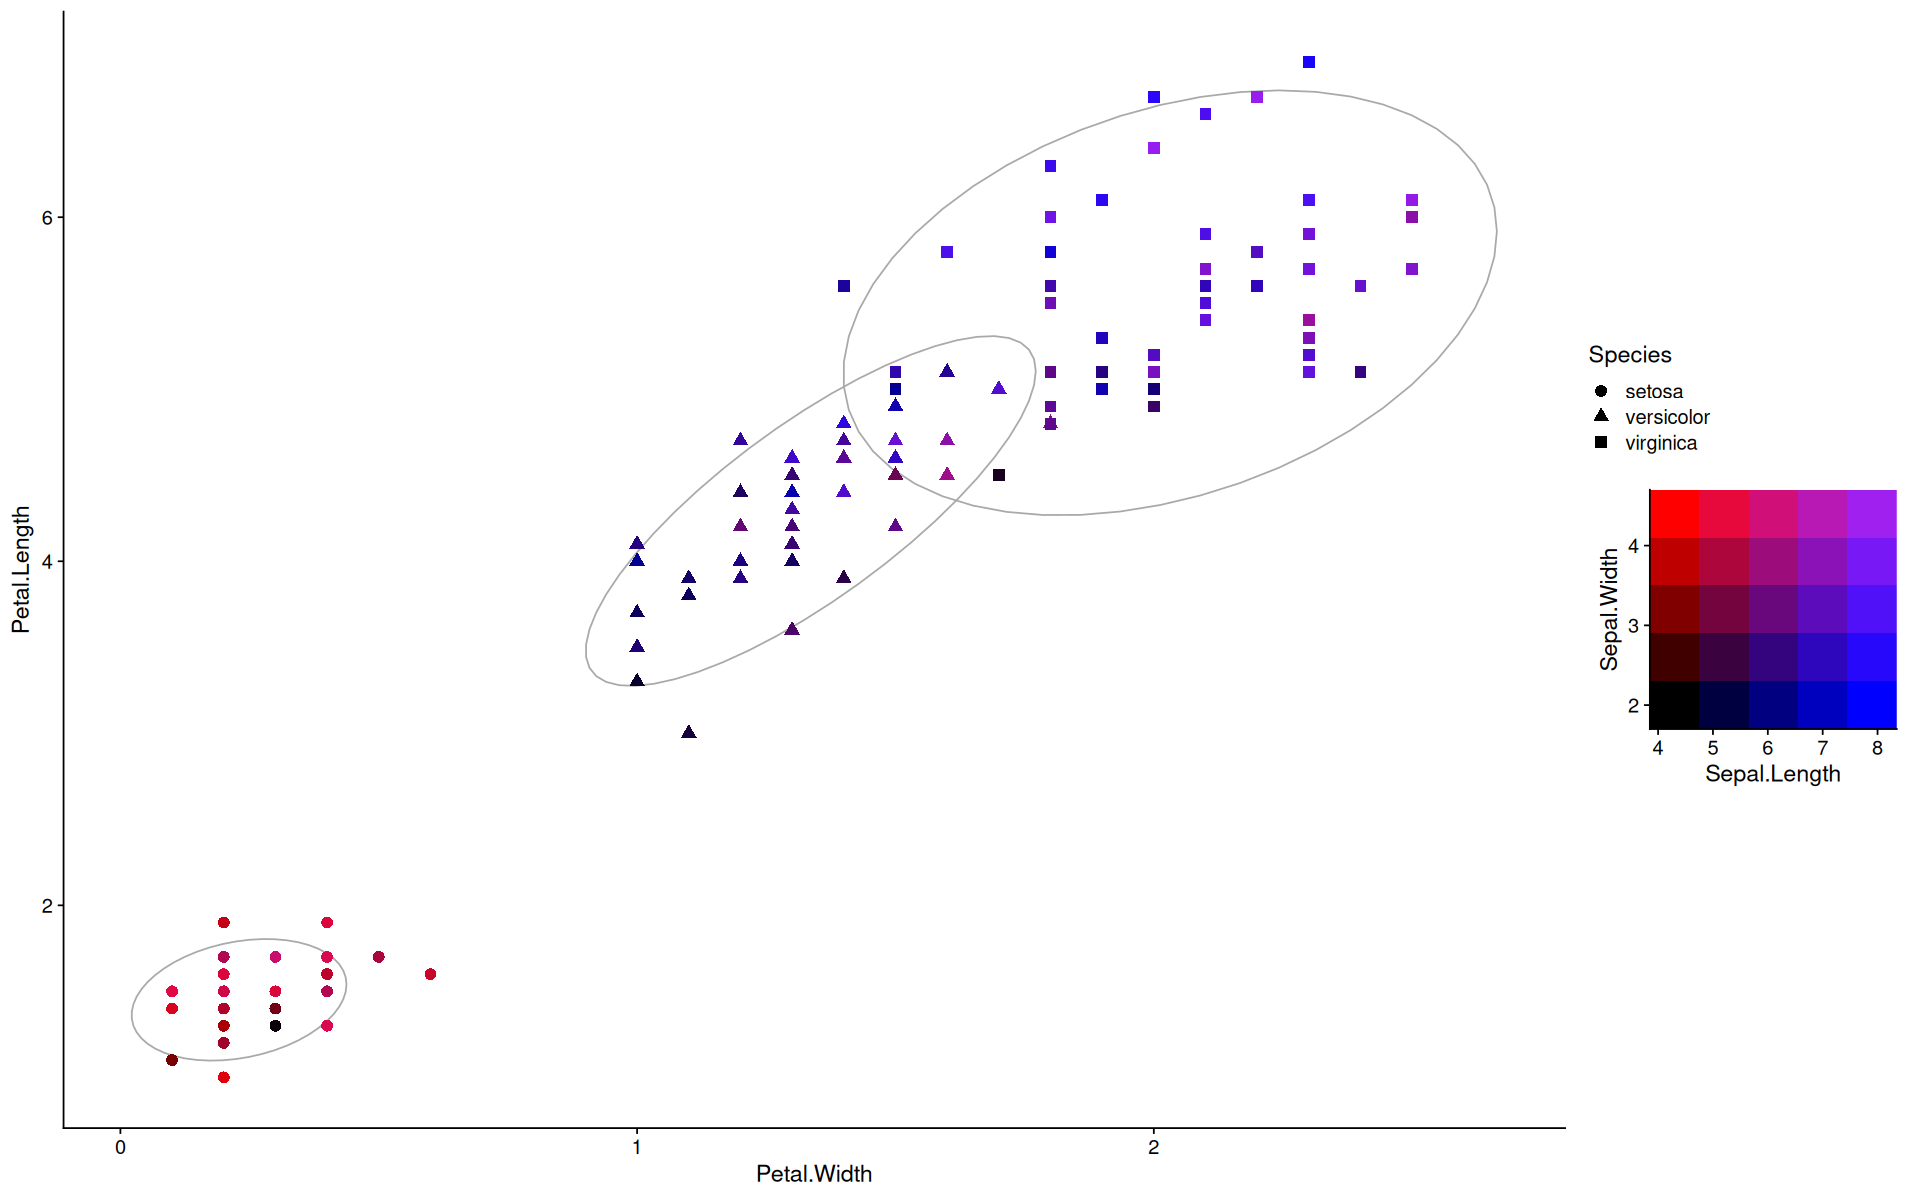

In [4]:
colors <- c('purple', 'blue', 'black', 'red')

r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=colors)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))

## other palettes

In [5]:
color(arc.bluepink())

<colors>
#FFFFFFFF #FFE6FEFF #FFBDFFFF #FF80FEFF #E7FFFFFF #D7DAFDFF #D8A6FFFF #C065FEFF #C0FCFDFF #A7CAFFFF #8D7EFDFF #7F65FEFF #74FEFFFF #64C0FFFF #5873FEFF #4B4CFFFF 

In [6]:
color(arc.bluepink()[c(16,4,1,13)])

<colors>
#4B4CFFFF #FF80FEFF #FFFFFFFF #74FEFFFF 

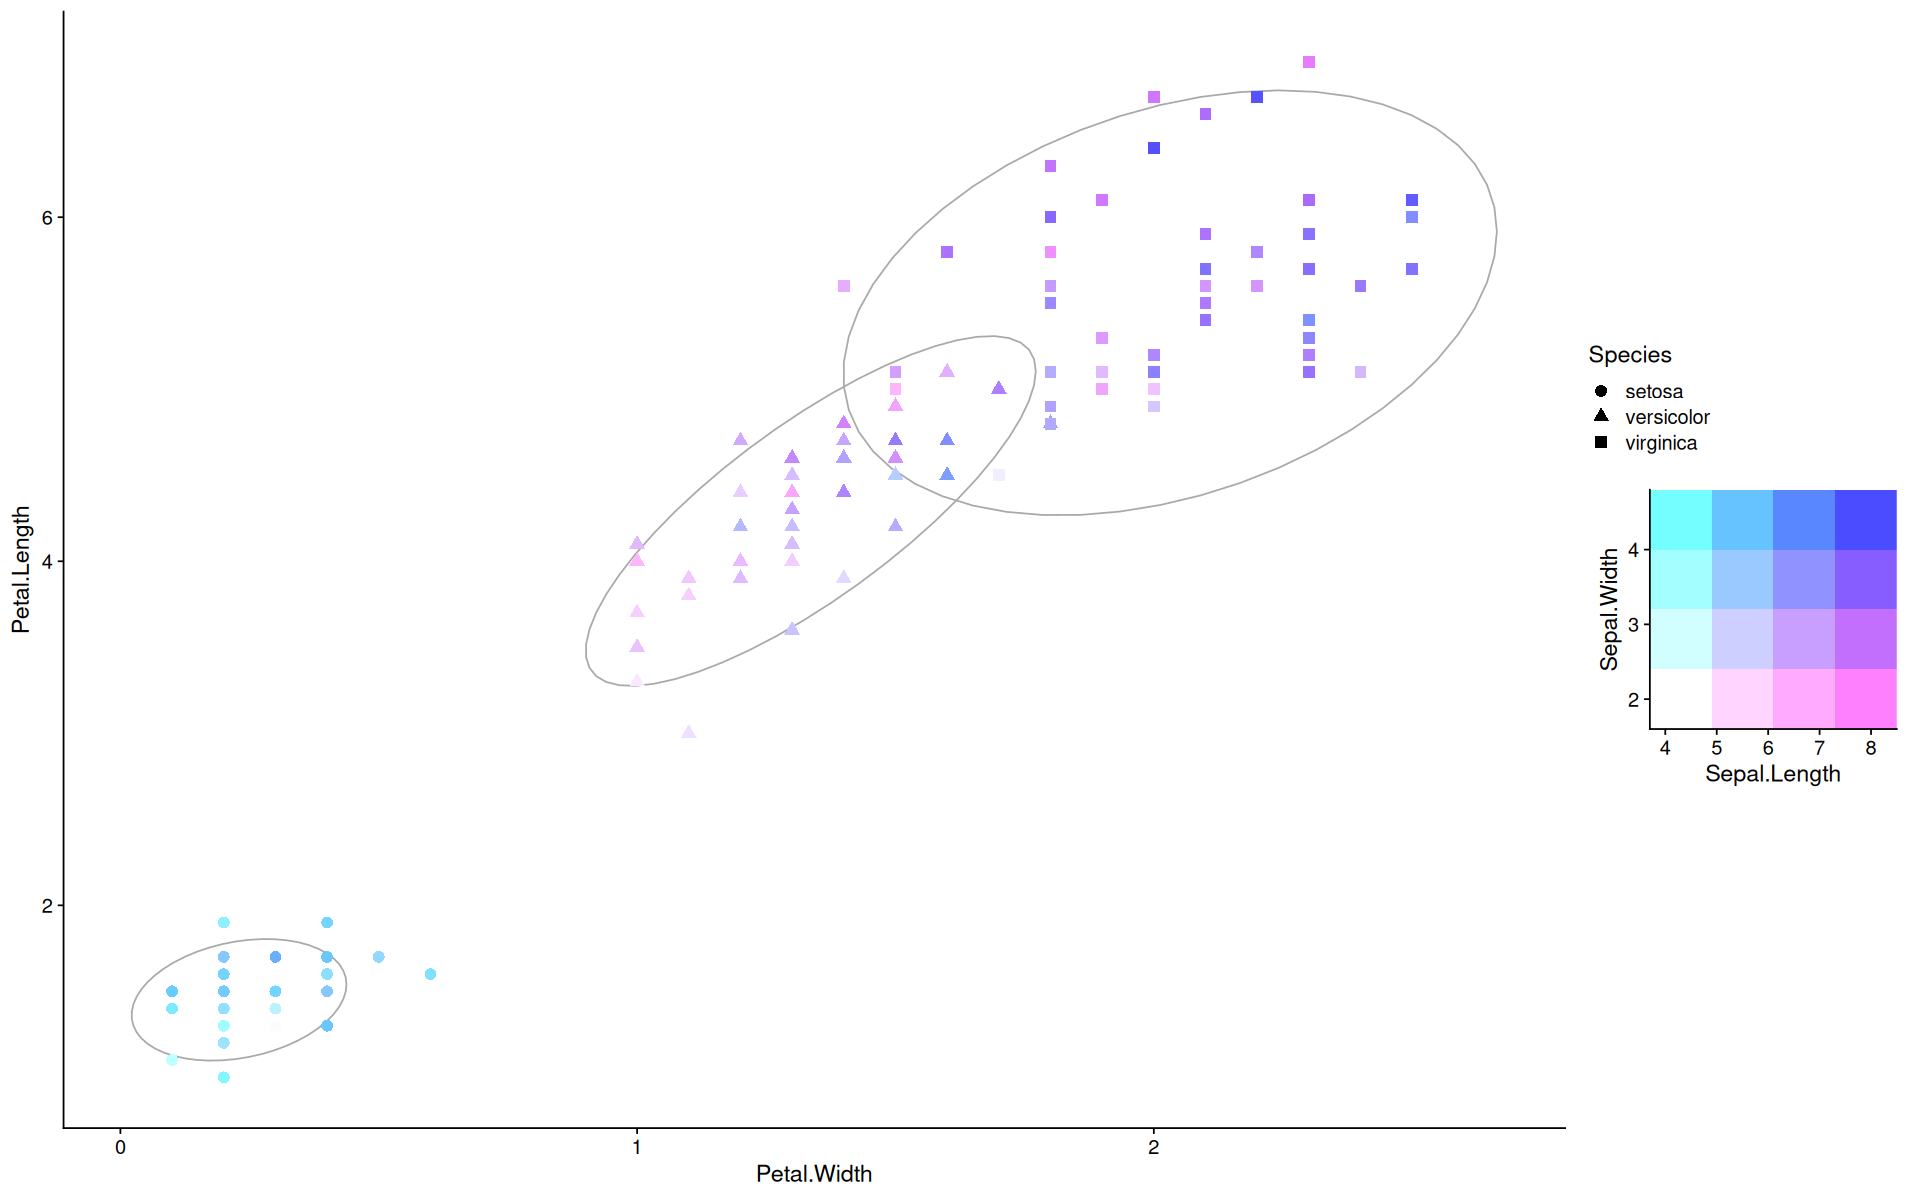

In [7]:
r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=arc.bluepink()[c(16,4,1,13)], size=4)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))

In [8]:
color(tolochko.redblue())

<colors>
#DDDDDDFF #7BB3D1FF #016EAEFF #DD7C8AFF #8D6C8FFF #4A4779FF #CC0024FF #8A274AFF #4B264DFF 

In [9]:
color(tolochko.redblue()[c(9,3,1,7)])

<colors>
#4B264DFF #016EAEFF #DDDDDDFF #CC0024FF 

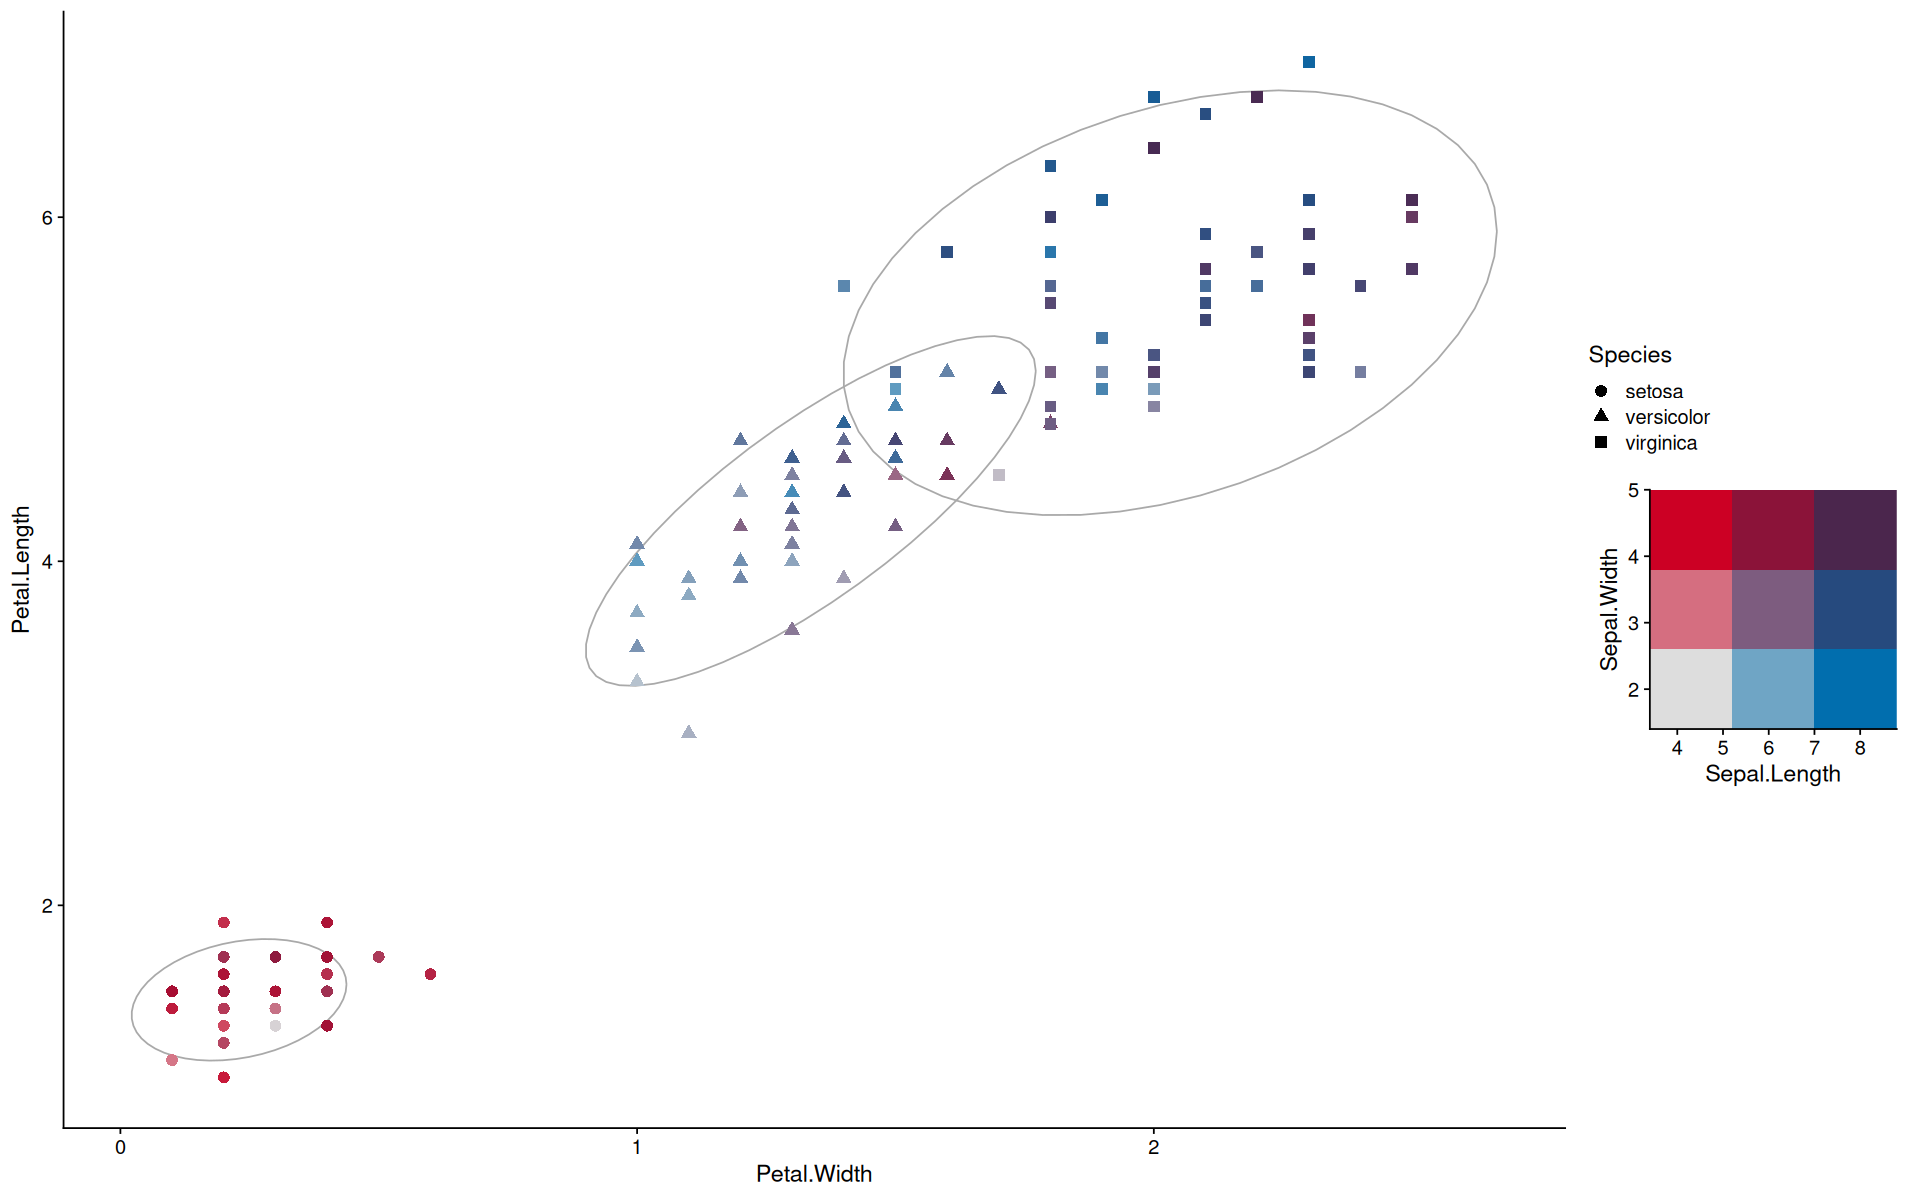

In [10]:
r <- map_to_color2d(iris, xvar=Sepal.Length, yvar=Sepal.Width, colors=tolochko.redblue()[c(9,3,1,7)], size=3)

ggplot(r$data, aes(y=Petal.Length, x=Petal.Width, color=color, shape=Species, group=Species)) +
stat_ellipse(color='darkgray') +
geom_point(size=3) +
scale_color_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))

# Choropleth

see also: https://cran.r-project.org/web/packages/pals/vignettes/bivariate_choropleths.html

In [11]:
library(sf)

Linking to GEOS 3.12.2, GDAL 3.9.0, PROJ 9.4.1; sf_use_s2() is TRUE



In [12]:
data(USCancerRates, package='latticeExtra')
data <- 
    maps::map("county", fill=TRUE, plot =FALSE, projection = "tetra") |>
    st_as_sf() |> 
    as_tibble() |>
    left_join(rownames_to_column(USCancerRates, 'ID'), by='ID')

head(data, 3)

ID,geom,rate.male,LCL95.male,UCL95.male,rate.female,LCL95.female,UCL95.female,state,county
<chr>,<MULTIPOLYGON [°]>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<I<chr>>
"alabama,autauga",MULTIPOLYGON (((0.256464688...,283.1,242.6,329.8,173.6,149.8,200.3,Alabama,Autauga County
"alabama,baldwin",MULTIPOLYGON (((0.220116483...,239.2,223.5,255.8,162.0,150.7,174.1,Alabama,Baldwin County
"alabama,barbour",MULTIPOLYGON (((0.288449217...,335.9,288.9,389.1,185.3,157.2,217.5,Alabama,Barbour County


In [13]:
library(paletteer)

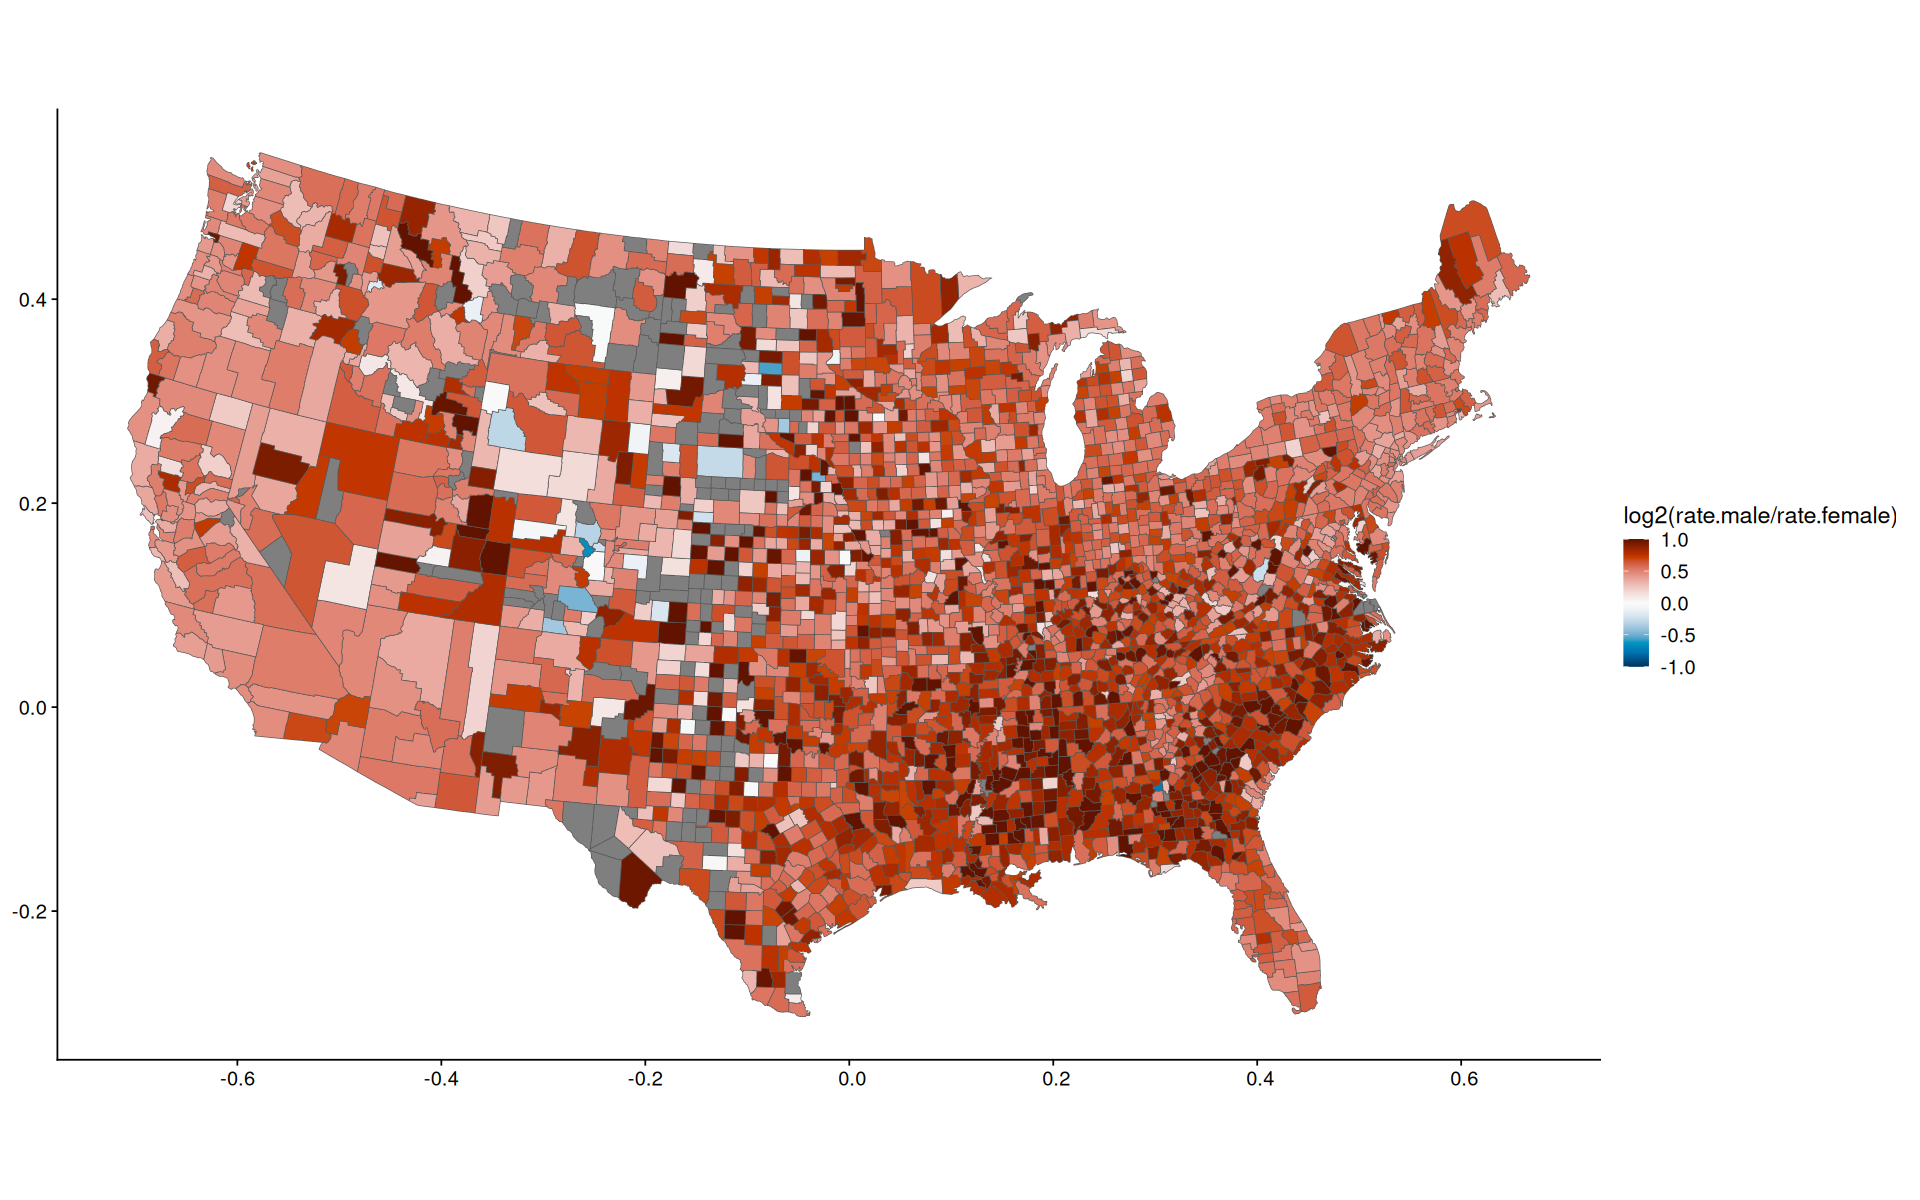

In [14]:
data |>
ggplot(aes(fill=log2(rate.male/rate.female), geometry=geom)) +
geom_sf() +
scale_fill_paletteer_c(palette = 'grDevices::RdBu',limits=c(-1,1), oob=scales::squish, direction = -1)

In [15]:
color(stevens.pinkgreen())

<colors>
#F3F3F3FF #C2F1CEFF #8BE2AFFF #EAC5DDFF #9EC6D3FF #7FC6B1FF #E6A3D0FF #BC9FCEFF #7B8EAFFF 

In [16]:
color(stevens.pinkgreen()[c(9,3,1,7)])

<colors>
#7B8EAFFF #8BE2AFFF #F3F3F3FF #E6A3D0FF 

In [17]:
r <- map_to_color2d(data, xvar=rate.male, yvar=rate.female, colors=stevens.pinkgreen()[c(9,3,1,7)], size=3, na.color='gray60')

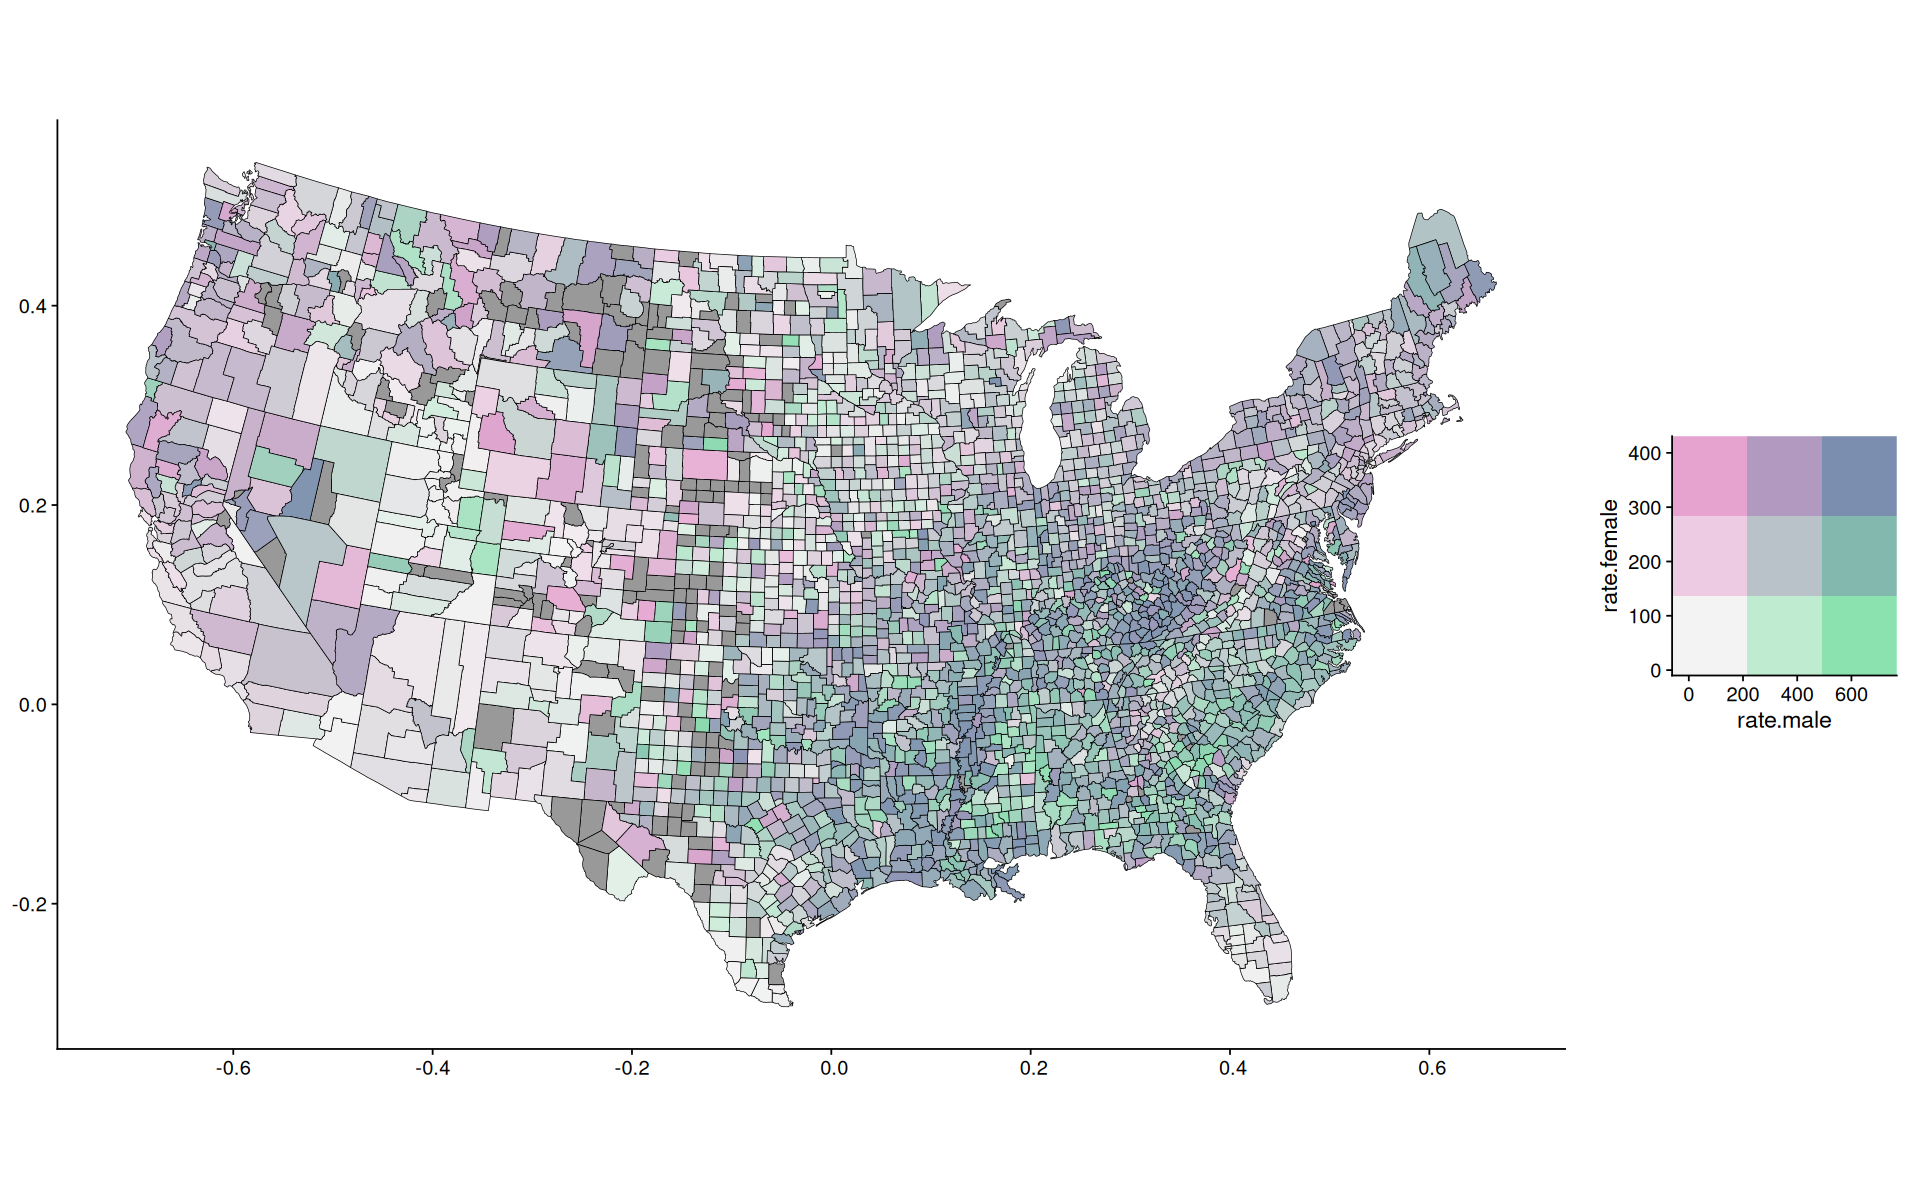

In [18]:
r$data |>
mutate(lab=ifelse(rate.female>400, ID, NA)) |>
ggplot(aes(fill=color, geometry=geom)) +
geom_sf(color='black') +
scale_fill_identity() +
guides(custom = guide_custom(as_grob(r$legend), width=unit(0.4,'npc'), height=unit(0.4,'npc')))